In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.fftpack import ifft
from tqdm import tqdm

In [116]:
input_frame = pd.read_csv("E1-3.1.csv")
input_frame.rename(columns={'Intensity':'Amplitude'}, inplace=True)
# xi = x / (lambda * z)
input_frame["xi"]=input_frame["x"]/0.25
input_frame

,x,Amplitude,xi
0,-200000.000000,0.590818,-800000.000000
1,-199959.996000,0.589447,-799839.983998
2,-199919.991999,0.588078,-799679.967997
3,-199879.987999,0.586709,-799519.951995
4,-199839.983998,0.585340,-799359.935994
...,...,...,...
9995,199839.983998,0.585340,799359.935994
9996,199879.987999,0.586709,799519.951995
9997,199919.991999,0.588078,799679.967997
9998,199959.996000,0.589447,799839.983998


In [117]:
# Poor man's ift
def my_ift(x):
    return np.sum(input_frame["Amplitude"]*np.exp(2*np.pi*1j*x*input_frame["xi"]))

In [118]:
xprime = np.linspace(-0.1,0.1,2001)
A_re = np.array([])
A_im = np.array([])

In [119]:
for x in tqdm(xprime):
    A_re = np.append(A_re, my_ift(x).real)
    A_im = np.append(A_im, my_ift(x).imag)

100%|██████████| 2001/2001 [00:06<00:00, 322.48it/s]


In [120]:
A_im /= A_re.max()
A_re /= A_re.max()

In [121]:
aperture = pd.DataFrame(np.stack((xprime, A_re, A_im), axis = 1), columns=["xprime", "A_re", "A_im"])
aperture

,xprime,A_re,A_im
0,-0.1000,0.006123,1.820921e-13
1,-0.0999,0.000176,-3.055077e-14
2,-0.0998,0.000127,2.387587e-13
3,-0.0997,0.000119,1.713912e-13
4,-0.0996,0.000116,-1.057517e-13
...,...,...,...
1996,0.0996,0.000116,1.057517e-13
1997,0.0997,0.000119,-1.713912e-13
1998,0.0998,0.000127,-2.387587e-13
1999,0.0999,0.000176,4.323047e-15


In [122]:
aperture_sorted = aperture.sort_values('A_re', ascending = False)
# aperture_sorted_im = aperture.sort_values('A_im', ascending = False)

In [123]:
aperture_sorted.head(20)

,xprime,A_re,A_im
1000,0.0000,1.000000,0.000000e+00
1500,0.0500,0.211881,2.691793e-12
500,-0.0500,0.211881,-2.758013e-12
750,-0.0250,0.100832,-5.093114e-13
1250,0.0250,0.100832,5.229450e-13
1625,0.0625,0.022556,1.144138e-13
375,-0.0625,0.022556,-1.144138e-13
1750,0.0750,0.012430,9.383092e-14
250,-0.0750,0.012430,-9.383092e-14
125,-0.0875,0.008391,1.195372e-14


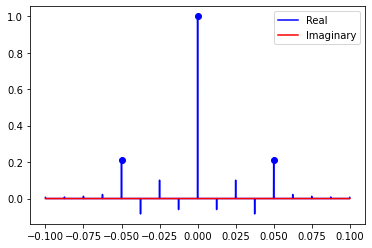

In [129]:
plt.plot(xprime,A_re,color="blue", label="Real")
plt.plot(xprime,A_im,color="red", label="Imaginary")
plt.scatter(aperture_sorted.head(3)["xprime"], aperture_sorted.head(3)["A_re"], marker="o", color="blue")
plt.legend()
plt.show()